In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S1/Office_Allyson-S1.csv",index_col='timestamp')

In [4]:
len(df)

2160

In [5]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [6]:
len(train_data),len(test_data)

(1440, 720)

In [7]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [8]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [9]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [10]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [11]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
#X_train = np.reshape(X_train, (8016, seq_len, 1))
#X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [12]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24)
y_train.shape =  (1416,)
X_test.shape =  (696, 24)
y_test.shape =  (696,)


In [13]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [14]:
input_layer = Input(shape=24, dtype='float32')
dense1 = Dense(24, activation='linear')(input_layer)
dense2 = Dense(18, activation='linear')(dense1)
dense3 = Dense(18, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 18)                450       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,069
Trainable params: 1,069
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=300)

Epoch 1/300
12/12 [==============================] - 1s 2ms/step - loss: 1327.3602
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 522.5054
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 283.8405
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 220.9093
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 165.8810
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 147.5779
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 142.1658
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 130.9209
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 116.5433
Epoch 10/300
12/12 [==============================] - 0s 3ms/step - loss: 106.8229
Epoch 11/300
12/12 [==============================] - 0s 3ms/step - loss: 105.3267
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 96.0308
Epoch 13/300


In [16]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [18]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [19]:
print('Root Mean Squared Error for ANN Model for training is:',rmse_train)
print('Root Mean Squared Error for ANN Model for testing is:',rmse_test)
print('Mean Absolute Error for ANN Model for training is:',mae_train)
print('Mean Absolute Error for ANN Model for testing is:',mae_test)
print('MAPE for ANN Model for training is:',mape_train)
print('MAPE for ANN Model for testing is:',mape_test)

Root Mean Squared Error for ANN Model for training is: 4.268007906424191
Root Mean Squared Error for ANN Model for testing is: 2.6909512125887445
Mean Absolute Error for ANN Model for training is: 2.197959844325222
Mean Absolute Error for ANN Model for testing is: 1.6887987106147853
MAPE for ANN Model for training is: 0.09643233655910897
MAPE for ANN Model for testing is: 0.07132414436949253


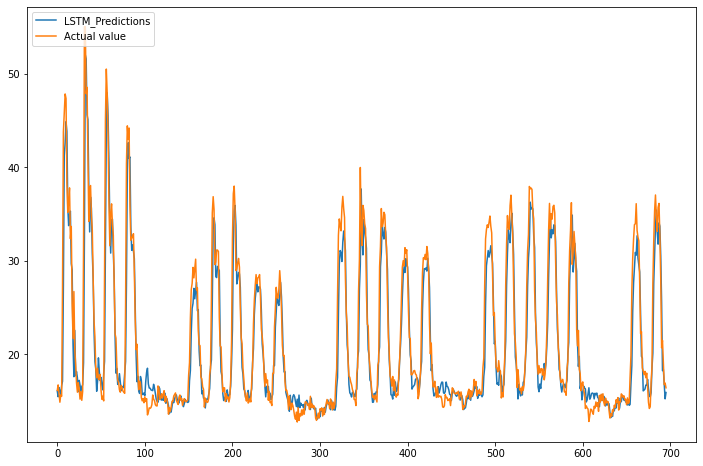

In [20]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [21]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([16.15]), array([16.089571], dtype=float32))

In [22]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.060429]), array([1.2685511]), array([-0.58152283]), array([-1.21665131]), array([-0.00024803]), array([-1.13768814]), array([9.91413788]), array([16.43484619]), array([4.47200012]), array([5.2518042]), array([2.47503815]), array([-5.4800383]), array([-0.55069595]), array([2.58807907]), array([2.85423737]), array([-2.9417485]), array([3.99267738]), array([-3.67988312]), array([0.65200752]), array([9.10830566]), array([-2.00967735]), array([1.18032112]), array([-1.22340065]), array([-1.54349617]), array([0.96354721]), array([-0.88585106]), array([-1.49027946]), array([0.01019028]), array([-1.46704308]), array([-0.70629021]), array([12.26857674]), array([22.78056839]), array([3.01376678]), array([-3.70859039]), array([2.93469696]), array([-3.94566879]), array([-3.78143219]), array([4.72840149]), array([1.22787552]), array([-0.77702805]), array([2.52397041]), array([-0.00982567]), array([1.09696777]), array([2.62996758]), array([0.02571434]), array([1.44317818]), array([1.4230132

In [23]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([22.78056839]), array([-6.2190152]))

In [24]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [25]:
len(neg),len(pos)

(304, 392)